<a href="https://colab.research.google.com/github/anujshetty/SearchAndResQ/blob/main/Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import unicode_literals
import time

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython import display

from Gridworld import Gridworld
from utils import visualize_grid, policy_score, simulate_policy, heatmap, plot_scores

from Learning import QLearningModel, EpsilonGreedyExploration, GreedyPolicy, ValueIterationModel


(5, 5, 4, 3, 3, 3, 6)
[0, 1, 3, 0, 0, 0]


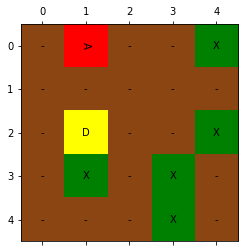

In [82]:
g_rand = Gridworld(gridworld_length=5, gridworld_width=5, num_obstacles=5,
                 collisionReward= -1, destinationReward= 1, defaultReward= -0.1, outOfBoundsReward = -0.1, 
                 failChance= 0.1, gamma= 0.95)
eps_greedy_policy =  EpsilonGreedyExploration(g_rand, 0.6, alpha=0.9)
qlearning_model = QLearningModel(g_rand, 0.2)
print(qlearning_model.Q.shape)
visualize_grid(g_rand)
print(g_rand.state)

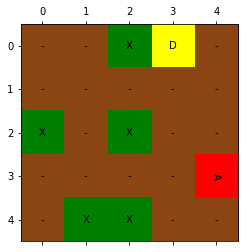

In [46]:
g_rand.reset_position()
visualize_grid(g_rand)

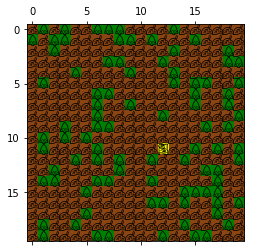

In [ ]:
scores = [] 
for i in range(100000):
    g_rand.reset_position()
    score = simulate_policy(g_rand, model=qlearning_model, policy=eps_greedy_policy, 
                    run_to_completion=False, num_steps=50, visualize=False)
    scores.append(score)
visualize_grid(g_rand)


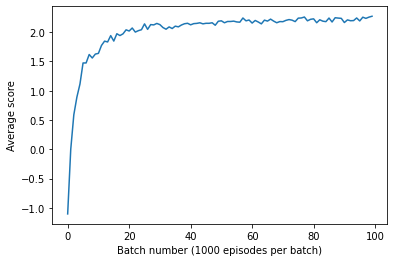

In [ ]:
plot_scores(scores)

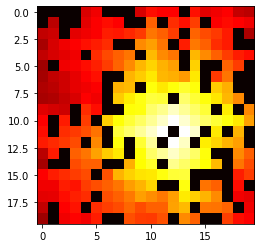

In [ ]:
heatmap(qlearning_model.Q)

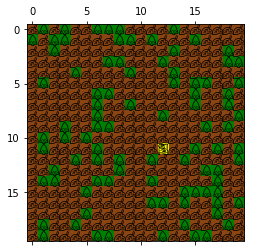

In [ ]:
visualize_grid(g_rand)

In [ ]:
learned_policy = GreedyPolicy(qlearning_model.extract_policy(), g_rand,qlearning_model)
print(learned_policy.policy)

AttributeError: 'QLearningModel' object has no attribute 'extract_policy'

In [40]:
# reset agent position in existing grid
g_rand.reset_position()

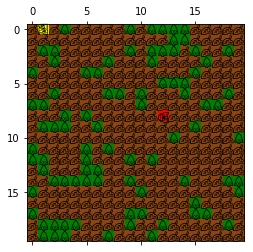

In [ ]:
visualize_grid(g_rand)

33


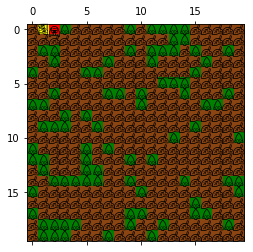

In [ ]:
policy_score_learned = simulate_policy(g_rand, model=None, policy=learned_policy, run_to_completion=True)

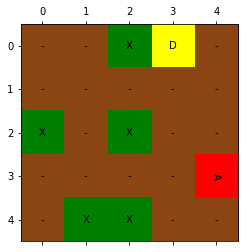

In [47]:
visualize_grid(g_rand)

In [ ]:
print(policy_score_learned)

0.9201295511778791


# Value Iteration

In [83]:
value_model = ValueIterationModel(g_rand, maxIter=1000)
value_model.value_update()

False

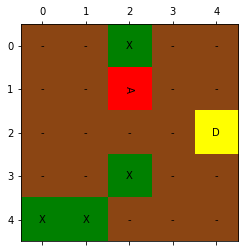

In [75]:
g_rand.reset_position()
visualize_grid(g_rand)

In [78]:

policy_score_learned = simulate_policy(g_rand, model=value_model, policy=GreedyPolicy(g_rand), run_to_completion=True)

In [84]:
U = value_model.U
for i in U:
  for j in i:
    print(j)

[14.78058021 12.40329409 13.14189668 14.77867033]
[14.78075638 12.59845857 12.02300725 13.12198183]
[12.42527694 11.5138763  12.02527244 12.42932528]
[12.42777327 11.5139305  11.85358408 12.96419886]
[12.38357942 11.80813922 12.95943538 12.95962449]
[14.83032637 13.02815206 13.46959676 13.94136994]
[13.0999728  12.62137735 12.35304499 12.33023215]
[13.0224464  11.98133443 12.34620699 12.90312079]
[12.2147841  11.54983823 11.77546481 13.02362955]
[11.40741669 11.11755175 12.21164539 12.26636738]
[17.32730976 14.27671441 14.27764544 16.37983745]
[17.43189487 14.03566684 15.05296019 16.5188611 ]
[12.41764811 12.22211526 12.45680235 12.55417761]
[11.46212638 11.02831563 12.2663678  12.26636738]
[11.40741669 11.08970803 12.09538547 12.26636738]
[17.56028353 13.45115796 15.36919584 15.58091151]
[17.56030013 14.33748967 15.22146022 16.69292942]
[12.89511575 11.70650995 11.81721141 11.83724586]
[11.72059676 11.45979987 11.79549182 11.83736568]
[-2. -2. -2. -2.]
[16.46558996 13.30978716 14.4635

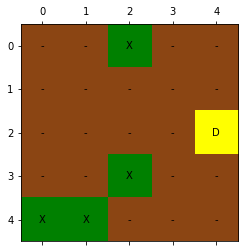

In [73]:
visualize_grid(g_rand)